# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from transformers import pipeline
from transformers import BertTokenizer
import re

# Importing DataFrame

In [2]:
mental_health = pd.read_csv("Dataset//mental_health.csv")
mental_health.head(6)

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
5,hey rredflag sure right place post this goes ...,1


# Data Visualization & Transformation

In [3]:
mental_health.size

55954

In [4]:
mental_health.shape

(27977, 2)

In [5]:
distinct_values = np.unique(mental_health["label"], return_counts=True)
distinct_values

(array([0, 1]), array([14139, 13838]))

In [6]:
classes = mental_health["label"].unique()
pd.DataFrame(np.unique(mental_health["label"], return_counts=True), index=["Value", "count"])

,0,1
Value,0,1
count,14139,13838


In [7]:
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


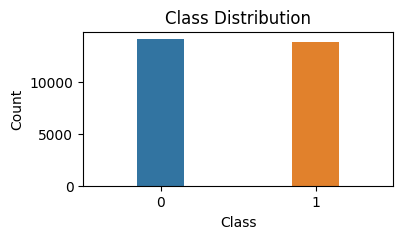

In [8]:
# Plot class distribution
plt.figure(figsize=(4, 2))
sns.countplot(data=mental_health, x="label", width=0.3)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

# Data Splitting

In [9]:
x = mental_health.text
y = mental_health.label

In [10]:
pd.set_option('display.max_colwidth', None)

In [11]:
custom_stopwords = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself',
    'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
    'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while',
    'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above',
    'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once',
    'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some',
    'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don',
    "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
    "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren',
    "weren't", 'won', "won't", 'wouldn', "wouldn't"
]

# Lowercasing
mental_health['text'] = mental_health['text'].str.lower()

# Removing Punctuations
mental_health['text'] = mental_health['text'].str.replace(r'[^\w\s]+', '', regex=True)


# Removing Stop Words
mental_health['text'] = mental_health['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in custom_stopwords]))

# Tokenizing using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
mental_health['text'] = mental_health['text'].apply(lambda x: tokenizer.tokenize(x))

mental_health.head()

,text,label
0,"[dear, american, teens, question, dutch, person, heard, guys, get, way, easier, things, learn, age, us, soo, ##oo, ##o, th, ##th, graders, like, right, guys, learn, math]",0
1,"[nothing, look, forward, life, ##i, don, ##t, many, reasons, keep, going, feel, like, nothing, keeps, going, next, day, makes, want, hang]",1
2,"[music, recommendations, im, looking, expand, play, ##list, usual, genres, alt, pop, minnesota, hip, hop, steam, ##pu, ##nk, various, indie, genres, artists, people, like, cave, ##town, alice, ##band, bug, hunter, penelope, scott, various, rhymes, ##ay, ##ers, willing, explore, new, genres, ##art, ##ists, anything, generic, rap, type, exclusively, sex, drugs, cool, rapper, rap, types, pretty, good, pop, popular, couple, years, ago, dunn, ##o, technical, genre, name, anyway, ##s, anyone, got, music, recommendations, favorite, artists, ##son, ##gs]",0
3,"[im, done, trying, feel, better, ##the, reason, im, still, alive, know, mum, devastated, ever, killed, ever, passes, im, still, state, im, going, hesitate, ending, life, shortly, im, almost, take, med, ##s, go, therapy, nothing, seems, help, enough, don, ##t, want, around, anymore, hate, feeling, like, wouldn, ##t, wish, upon, enemy, brain, feels, like, constantly, like, static, tv, won, ##t, shut, over, ##thi, ##nk, ##ing, think, im, running, options, don, ##t, see, living, past, got, accepted, health, science, degree, don, ##t, even, know, wanna, try, know, im, smart, mental, illness, holds, back, think, can, ##t, anything, im, good, enough, need, fucking, ...]",1
4,"[worried, year, old, girl, subject, domestic, physical, ##mental, house, ##with, ##out, going, lot, know, girl, know, girl, etc, let, give, brief, background, known, girl, years, lives, uk, live, different, country, kept, touch, electronic, means, first, girl, sc, ##hi, ##zo, ##ph, ##ren, ##ic, host, illnesses, dad, severe, anger, issues, abuses, physically, mentally, makes, serve, food, wash, dishes, clean, house, shouts, beats, petty, things, like, spilling, water, picking, toys, floor, threatened, knife, beats, plates, glasses, punches, head, last, time, got, beat, around, month, ago, one, siblings, gets, beat, tried, tell, mother, beating, showed, bruises, mother, refuses, believe, even, laughed, probably, fear, confronting, ...]",1


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Preparation & Evaluation

In [13]:
analyzer='word'
ngram_range = (1, 5)
min_df = 3
max_df = 0.8 
max_features = 5000 
stop_words = 'english'
sublinear_tf = True 

### Logistic Regression 

In [14]:
lr = Pipeline([
    ('tfidf', TfidfVectorizer(
        analyzer=analyzer,
        ngram_range=ngram_range,
        min_df=min_df,
        max_df=max_df,
        max_features=max_features,
        sublinear_tf=sublinear_tf
    )),
    ('lrc', LogisticRegression(max_iter=1000, random_state=42))  
])
lr.fit(x_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, max_features=5000, min_df=3,
                                 ngram_range=(1, 5), sublinear_tf=True)),
                ('lrc', LogisticRegression(max_iter=1000, random_state=42))])

In [15]:
y_pred = lr.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

lr_acc = accuracy

# Print the accuracy
print("Logistic Regression Accuracy:", accuracy)
print(y_test[:11])
print(y_pred[:11])

Logistic Regression Accuracy: 0.9240528949249464
6604     1
25912    1
18308    0
18875    1
23181    0
4981     1
14476    1
22070    1
26696    1
17518    0
25045    0
Name: label, dtype: int64
[1 1 0 1 0 1 1 1 1 0 0]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


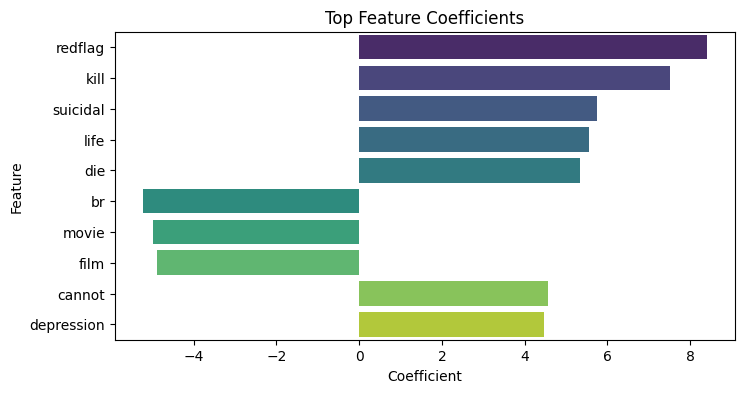

In [16]:
lr_model = lr.named_steps['lrc'] 
feature_names = lr.named_steps['tfidf'].get_feature_names_out()
coefficients = lr_model.coef_[0]
coefficient_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coefficient_df = coefficient_df.reindex(coefficient_df['Coefficient'].abs().sort_values(ascending=False).index)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=coefficient_df.head(10), x='Coefficient', y='Feature', palette='viridis')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top Feature Coefficients')
plt.show()

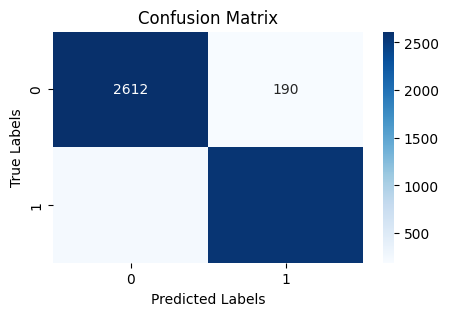

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 3))

class_names = mental_health['label'].unique()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [18]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2802
           1       0.93      0.92      0.92      2794

    accuracy                           0.92      5596
   macro avg       0.92      0.92      0.92      5596
weighted avg       0.92      0.92      0.92      5596



### K-Nearest Neighbor

In [19]:
knn = Pipeline([
    ('tfidf', TfidfVectorizer(
        ngram_range=ngram_range,
        min_df=min_df,
        max_df=max_df,
        max_features=max_features,
        stop_words=stop_words,
        sublinear_tf=sublinear_tf
    )),
    ('knn', KNeighborsClassifier(n_neighbors=599))
])
knn.fit(x_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, max_features=5000, min_df=3,
                                 ngram_range=(1, 5), stop_words='english',
                                 sublinear_tf=True)),
                ('knn', KNeighborsClassifier(n_neighbors=599))])

In [20]:
y_pred = knn.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

knn_acc = accuracy

# Print the accuracy
print("KNN Accuracy:", accuracy)
print(y_test[:11])
print(y_pred[:11])

KNN Accuracy: 0.8550750536097212
6604     1
25912    1
18308    0
18875    1
23181    0
4981     1
14476    1
22070    1
26696    1
17518    0
25045    0
Name: label, dtype: int64
[1 1 0 1 0 1 1 1 1 0 0]


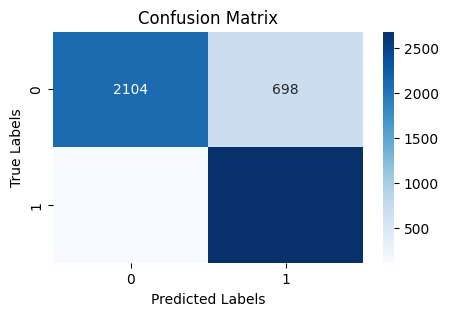

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
class_names = mental_health['label'].unique()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [22]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2802
           1       0.79      0.96      0.87      2794

    accuracy                           0.86      5596
   macro avg       0.87      0.86      0.85      5596
weighted avg       0.87      0.86      0.85      5596



### Naive Bayes(Multinomia)

In [23]:
nb_classifier = Pipeline([
    ('tfidf', TfidfVectorizer(
        ngram_range=ngram_range,
        min_df=min_df,
        max_df=max_df,
        max_features=max_features,
        stop_words=stop_words,
        sublinear_tf=sublinear_tf
    )),
    ('nbc', MultinomialNB())
])
nb_classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, max_features=5000, min_df=3,
                                 ngram_range=(1, 5), stop_words='english',
                                 sublinear_tf=True)),
                ('nbc', MultinomialNB())])

In [24]:
y_pred = nb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

nb_acc = accuracy

# Print the accuracy
print("MultinomiaNB Accuracy:", accuracy)
print(y_test[:11])
print(y_pred[:11])

MultinomiaNB Accuracy: 0.8927805575411007
6604     1
25912    1
18308    0
18875    1
23181    0
4981     1
14476    1
22070    1
26696    1
17518    0
25045    0
Name: label, dtype: int64
[1 1 0 1 0 1 1 1 1 0 0]


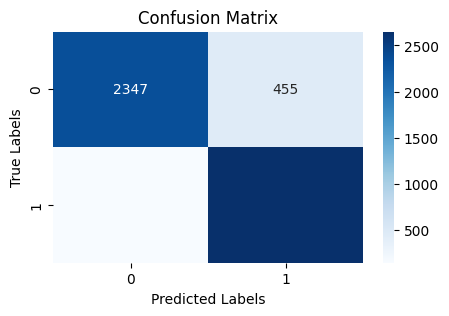

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
class_names = mental_health['label'].unique()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [26]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      2802
           1       0.85      0.95      0.90      2794

    accuracy                           0.89      5596
   macro avg       0.90      0.89      0.89      5596
weighted avg       0.90      0.89      0.89      5596



### Decision Tree

In [27]:
decision_tree_classifier = Pipeline([
    ('tfidf', TfidfVectorizer(
        ngram_range=ngram_range,
        min_df=min_df,
        max_df=max_df,
        max_features=max_features,
        stop_words=stop_words,
        sublinear_tf=sublinear_tf
    )),           
    ('dtc', DecisionTreeClassifier(max_depth=10, random_state=42))       
])
decision_tree_classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, max_features=5000, min_df=3,
                                 ngram_range=(1, 5), stop_words='english',
                                 sublinear_tf=True)),
                ('dtc', DecisionTreeClassifier(max_depth=10, random_state=42))])

In [29]:
y_pred = decision_tree_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

dtc_acc = accuracy

print("Decision Tree Accuracy:", accuracy)
print(y_test[:11])
print(y_pred[:11])

Decision Tree Accuracy: 0.8431022158684774
6604     1
25912    1
18308    0
18875    1
23181    0
4981     1
14476    1
22070    1
26696    1
17518    0
25045    0
Name: label, dtype: int64
[1 1 0 1 0 1 1 1 1 0 0]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


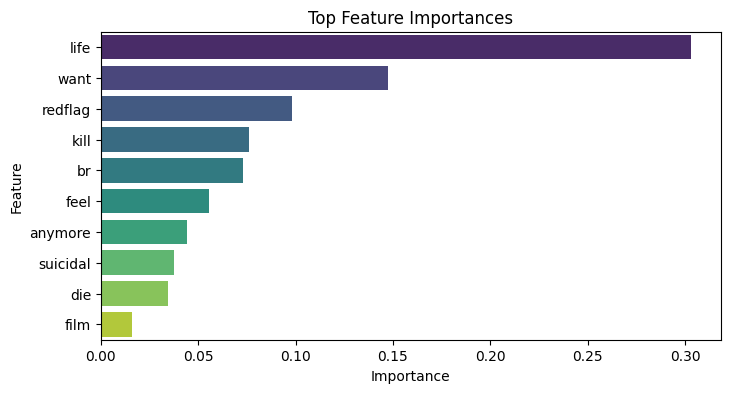

In [30]:
feature_names = decision_tree_classifier.named_steps['tfidf'].get_feature_names_out()
feature_importances = decision_tree_classifier.named_steps['dtc'].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances')
plt.show()

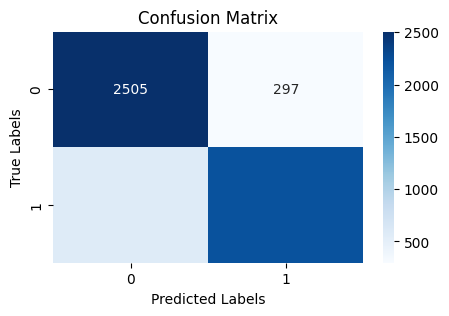

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
class_names = mental_health['label'].unique()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [32]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      2802
           1       0.88      0.79      0.83      2794

    accuracy                           0.84      5596
   macro avg       0.85      0.84      0.84      5596
weighted avg       0.85      0.84      0.84      5596



### Random Forest Tree

In [33]:
random_forest_classifier = Pipeline([
    ('tfidf', TfidfVectorizer(
        ngram_range=ngram_range,
        min_df=min_df,
        max_df=max_df,
        max_features=max_features,
        stop_words=stop_words,
        sublinear_tf=sublinear_tf
    )),                
    ('rfc', RandomForestClassifier(n_estimators=400, random_state=42))
])
random_forest_classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, max_features=5000, min_df=3,
                                 ngram_range=(1, 5), stop_words='english',
                                 sublinear_tf=True)),
                ('rfc',
                 RandomForestClassifier(n_estimators=400, random_state=42))])

In [34]:
y_pred = random_forest_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

rfc_acc = accuracy

# Print the accuracy
print("Random Forest Tree Accuracy:", accuracy)
print(y_test[:11])
print(y_pred[:11])

Random Forest Tree Accuracy: 0.8918870621872766
6604     1
25912    1
18308    0
18875    1
23181    0
4981     1
14476    1
22070    1
26696    1
17518    0
25045    0
Name: label, dtype: int64
[1 1 0 1 0 1 1 1 1 0 0]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


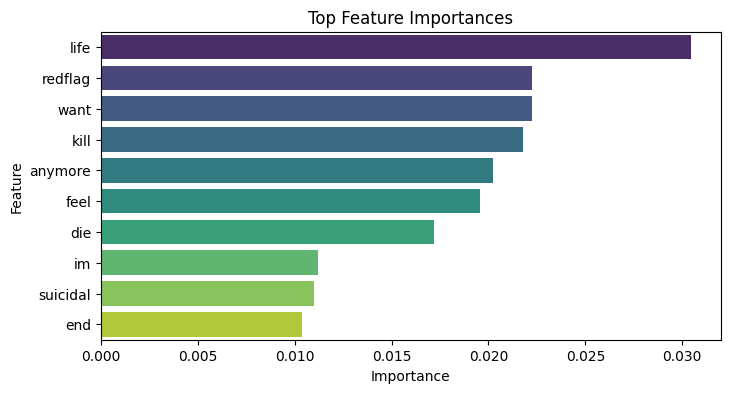

In [35]:
feature_names = random_forest_classifier.named_steps['tfidf'].get_feature_names_out()
feature_importances = random_forest_classifier.named_steps['rfc'].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(8, 4))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances')
plt.show()

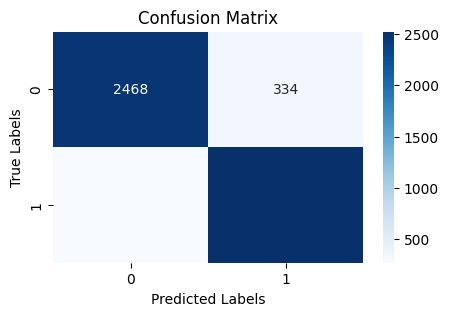

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
class_names = mental_health['label'].unique()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [37]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2802
           1       0.88      0.90      0.89      2794

    accuracy                           0.89      5596
   macro avg       0.89      0.89      0.89      5596
weighted avg       0.89      0.89      0.89      5596



### Support Vector Machine

In [38]:
svm = Pipeline([
    ('tfidf', TfidfVectorizer(
        ngram_range=ngram_range,
        min_df=min_df,
        max_df=max_df,
        max_features=max_features,
        stop_words=stop_words,
        sublinear_tf=sublinear_tf
    )),         
    ('svmc', SVC(kernel="rbf", random_state=42))                    
])
svm.fit(x_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, max_features=5000, min_df=3,
                                 ngram_range=(1, 5), stop_words='english',
                                 sublinear_tf=True)),
                ('svmc', SVC(random_state=42))])

In [39]:
y_pred = svm.predict(x_test)

# Calculate accuracyY
accuracy = accuracy_score(y_test, y_pred)

svm_acc = accuracy

# Print the accuracy
print("SVM Accuracy:", accuracy)

SVM Accuracy: 0.9235167977126519


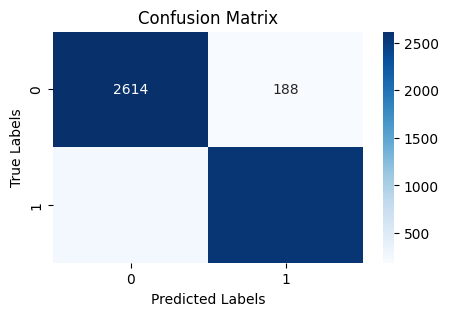

In [40]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
class_names = mental_health['label'].unique()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [41]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2802
           1       0.93      0.91      0.92      2794

    accuracy                           0.92      5596
   macro avg       0.92      0.92      0.92      5596
weighted avg       0.92      0.92      0.92      5596



### Voting Classifier

In [42]:
voting_classifier = VotingClassifier(
    estimators=[
        ('lrc', lr),
        ('knn', knn),
        ('nbc', nb_classifier),
        ('dtc', decision_tree_classifier),
        ('rfc', random_forest_classifier),
        ('svmc', svm)
    ],
    voting='hard'  
)
voting_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('lrc',
                              Pipeline(steps=[('tfidf',
                                               TfidfVectorizer(max_df=0.8,
                                                               max_features=5000,
                                                               min_df=3,
                                                               ngram_range=(1,
                                                                            5),
                                                               sublinear_tf=True)),
                                              ('lrc',
                                               LogisticRegression(max_iter=1000,
                                                                  random_state=42))])),
                             ('knn',
                              Pipeline(steps=[('tfidf',
                                               TfidfVectorizer(max_df=0.8,
                                                               max_features=5000,
                                                               min_df=3,
                                                               ngram_range=(1,
                                                                            5),
                                                               stop_words='english',
                                                               sublinear_t...
                                               TfidfVectorizer(max_df=0.8,
                                                               max_features=5000,
                                                               min_df=3,
                                                               ngram_range=(1,
                                                                            5),
                                                               stop_words='english',
                                                               sublinear_tf=True)),
                                              ('rfc',
                                               RandomForestClassifier(n_estimators=400,
                                                                      random_state=42))])),
                             ('svmc',
                              Pipeline(steps=[('tfidf',
                                               TfidfVectorizer(max_df=0.8,
                                                               max_features=5000,
                                                               min_df=3,
                                                               ngram_range=(1,
                                                                            5),
                                                               stop_words='english',
                                                               sublinear_tf=True)),
                                              ('svmc',
                                               SVC(random_state=42))]))])

In [43]:
y_pred = voting_classifier.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)

vc_acc = accuracy

print("Models Accuracy:", accuracy)

Models Accuracy: 0.9192280200142959


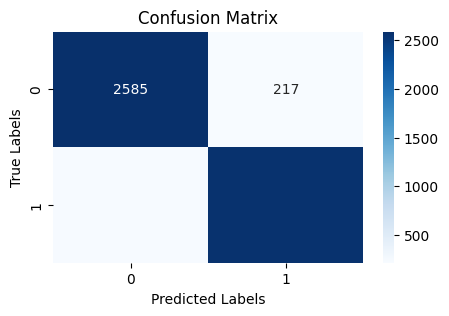

In [44]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
class_names = mental_health['label'].unique()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [45]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2802
           1       0.92      0.92      0.92      2794

    accuracy                           0.92      5596
   macro avg       0.92      0.92      0.92      5596
weighted avg       0.92      0.92      0.92      5596



# Visualize

In [78]:
data = {'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Naive Bayes', 'Decision Tree', 'Random Forest Classifier', 'Support Vector Machine', 'Voting Classifier'],
        'Accuracy': [lr_acc*100, knn_acc*100, nb_acc*100, dtc_acc*100, rfc_acc*100, svm_acc*100, vc_acc*100]}

models_acc = pd.DataFrame(data)
models_acc

,Model,Accuracy
0,Logistic Regression,92.405289
1,K-Nearest Neighbour,85.507505
2,Naive Bayes,89.278056
3,Decision Tree,84.310222
4,Random Forest Classifier,89.188706
5,Support Vector Machine,92.351680
6,Voting Classifier,91.922802


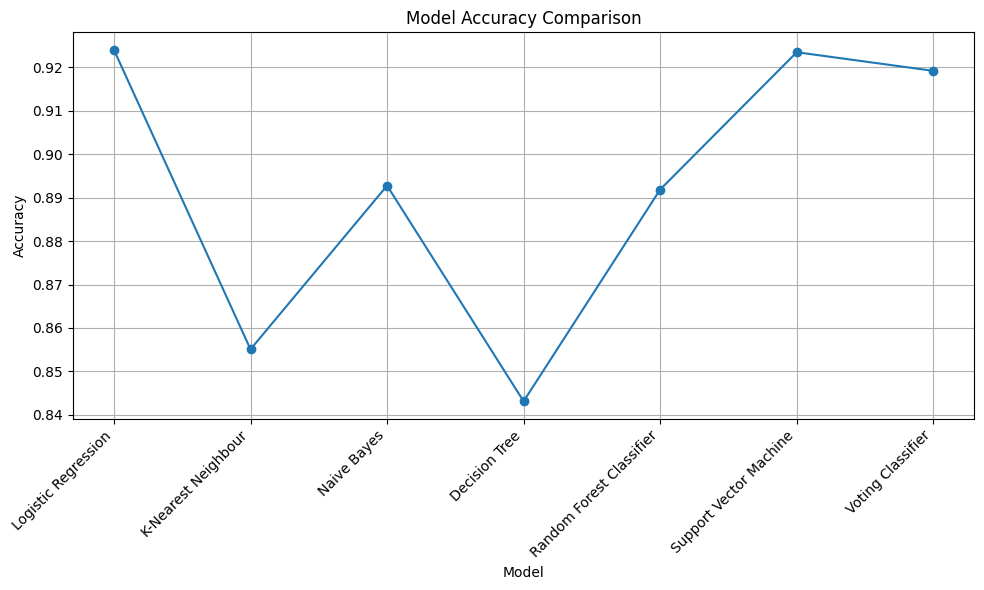

In [61]:
import matplotlib.pyplot as plt

# Assuming models_acc DataFrame is already created

plt.figure(figsize=(10, 6))
plt.plot(models_acc['Model'], models_acc['Accuracy'], marker='o')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

plt.show()

# User input

In [ ]:
custom_stopwords = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself',
    'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
    'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while',
    'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above',
    'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once',
    'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some',
    'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don',
    "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
    "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren',
    "weren't", 'won', "won't", 'wouldn', "wouldn't"
]

# Processing User Input
def preprocess(input_text):
    # Lowercasing
    input_text = input_text.lower()

    # Removing Punctuations
    input_text = re.sub(r'[^\w\s]+', '', input_text)

    # Removing custom stop words
    input_words = input_text.split()
    input_words = [word for word in input_words if word not in custom_stopwords]

    cleaned_text = ' '.join(input_words)

    return cleaned_text


# Example usage:
text = preprocess("Tomorrow")
print(text)

class_probs = lr.predict_proba([text])[0]

depressed_percentage = class_probs[1] * 100
suicide_watch_percentage = class_probs[0] * 100

if text == "":
    print("The string is empty")
else:
    if depressed_percentage > suicide_watch_percentage:
        print("The Text Is Classified as Depressed: ", depressed_percentage)
    else:
        print("The Text Is Classified as Sucidial", suicide_watch_percentage)


In [ ]:
# 1 = Positive Statement
# 0 = Negative Statement